#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading file

In [ ]:
df = pd.read_csv("run_results.csv")
df.head()

,title,runtime,genre,rating,votes,metascore
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,"626,167",71.0
1,Dune,155 min,"Action, Adventure, Drama",8.1,"563,930",74.0
2,The Black Phone,102 min,Horror,7.4,825,79.0
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,"48,078",49.0
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,"351,219",68.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.size

60000

In [ ]:
df.describe()

,rating,metascore
count,5712.000000,493.000000
mean,6.051961,59.192698
std,1.611265,16.164845
min,1.000000,7.000000
25%,5.000000,48.000000
50%,6.200000,59.000000
75%,7.200000,72.000000
max,10.000000,93.000000


#Data Cleaning

In [ ]:
df.isnull().any()

title        False
runtime       True
genre         True
rating        True
votes         True
metascore     True
dtype: bool

In [ ]:
df.isna().sum()

title           0
runtime      2945
genre         364
rating       4288
votes        4284
metascore    9507
dtype: int64

In [ ]:
df.isnull().sum()

title           0
runtime      2945
genre         364
rating       4288
votes        4284
metascore    9507
dtype: int64

Filling metascore column with 0 for null walue

In [ ]:
df['metascore'] = df['metascore'].fillna(0)
df

,title,runtime,genre,rating,votes,metascore
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,"626,167",71.0
1,Dune,155 min,"Action, Adventure, Drama",8.1,"563,930",74.0
2,The Black Phone,102 min,Horror,7.4,825,79.0
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,"48,078",49.0
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,"351,219",68.0
...,...,...,...,...,...,...
9995,Jattu Nikhattu,NaN,Biography,NaN,NaN,0.0
9996,Shoot to Saltara,120 min,Action,NaN,NaN,0.0
9997,Sette lune e un palmo di neve,NaN,Drama,NaN,NaN,0.0
9998,Insta-Lie,NaN,Drama,8.6,12,0.0


#Deleting or Removing null values

In [ ]:
df.isnull()

,title,runtime,genre,rating,votes,metascore
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,True,False,True,True,False
9996,False,False,False,True,True,False
9997,False,True,False,True,True,False
9998,False,True,False,False,False,False


In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df

,title,runtime,genre,rating,votes,metascore
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,"626,167",71.0
1,Dune,155 min,"Action, Adventure, Drama",8.1,"563,930",74.0
2,The Black Phone,102 min,Horror,7.4,825,79.0
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,"48,078",49.0
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,"351,219",68.0
...,...,...,...,...,...,...
9917,Nizhalai Varumo,58 min,Thriller,5.6,119,0.0
9954,The Silver Vindicator,163 min,"Action, Drama, Horror",7.6,16,0.0
9961,AMIA's Archival Screening Night Roadshow Editi...,101 min,History,7.6,16,0.0
9970,The Perfect Victim,101 min,Drama,5.8,6,0.0


In [ ]:
df.isnull().sum()

title        0
runtime      0
genre        0
rating       0
votes        0
metascore    0
dtype: int64

In [ ]:
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
9917    False
9954    False
9961    False
9970    False
9990    False
Length: 4990, dtype: bool

In [ ]:
df.columns

Index(['title', 'runtime', 'genre', 'rating', 'votes', 'metascore'], dtype='object')

#Converting Datatypes

In [ ]:
df.dtypes

title         object
runtime       object
genre         object
rating       float64
votes         object
metascore    float64
dtype: object

In [ ]:
# removing ',' 
df['votes'] = df['votes'].str.replace(',','')

In [ ]:
df.votes = df.votes.astype('int')

In [ ]:
df.dtypes

title         object
runtime       object
genre         object
rating       float64
votes          int64
metascore    float64
dtype: object

Spliting Genres

In [ ]:
df.head()

,title,runtime,genre,rating,votes,metascore
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,626167,71.0
1,Dune,155 min,"Action, Adventure, Drama",8.1,563930,74.0
2,The Black Phone,102 min,Horror,7.4,825,79.0
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,48078,49.0
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,351219,68.0


In [ ]:
url_genre = df.genre[0]
url_genre

'Action, Adventure, Fantasy'

In [ ]:
genres = url_genre.split(",")[0:]
genres

['Action', ' Adventure', ' Fantasy']

In [ ]:
newgenres = [genre.replace(",","") for genre in genres]
newgenres

['Action', ' Adventure', ' Fantasy']

In [ ]:
genres = "|".join(newgenres)
genres

'Action| Adventure| Fantasy'

In [ ]:
def get_genre(url):
        genres = url.split(",")[0:]
        newgenre = [genre.replace("|","") for genre in genres]
        genres = "|".join(newgenre)
        return genres


df['Genres'] = df.genre.map(get_genre)
df.head()

,title,runtime,genre,rating,votes,metascore,Genres
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,626167,71.0,Action| Adventure| Fantasy
1,Dune,155 min,"Action, Adventure, Drama",8.1,563930,74.0,Action| Adventure| Drama
2,The Black Phone,102 min,Horror,7.4,825,79.0,Horror
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,48078,49.0,Animation| Adventure| Comedy
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,351219,68.0,Action| Adventure| Thriller


In [ ]:
genre_set=set()
for genre in df.Genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)

42

In [ ]:
#to add columns
#Store in a new variable
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.Genres]
df.head()

,title,runtime,genre,rating,votes,metascore,Genres,Talk-Show,Family,Crime,...,Drama,Comedy,Action,History,Adventure,Biography,Romance,Western,Sport,Thriller
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,626167,71.0,Action| Adventure| Fantasy,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,Dune,155 min,"Action, Adventure, Drama",8.1,563930,74.0,Action| Adventure| Drama,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,The Black Phone,102 min,Horror,7.4,825,79.0,Horror,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,48078,49.0,Animation| Adventure| Comedy,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,351219,68.0,Action| Adventure| Thriller,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
df.shape

(4990, 49)

In [ ]:
genredf = df[list(genre_set)]
genredf.head()

,Talk-Show,Family,Crime,Thriller,War,Mystery,Adventure,Comedy,Fantasy,Fantasy,...,Drama,Comedy,Action,History,Adventure,Biography,Romance,Western,Sport,Thriller
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
# def get_genre(url):
#         genres = url.split(",")[0:]
#         newgenre = [genre.replace("|","") for genre in genres]
#         genres = "|".join(newgenre)
#         return genres


# df['Genres'] = df.genre.map(get_genre)
# df.head()

#Highest movie rating based on Genre

In [ ]:
Genres = df['Action']
Genres[:]

0        True
1        True
2       False
3       False
4        True
        ...  
9917    False
9954     True
9961    False
9970    False
9990    False
Name: Action, Length: 4990, dtype: bool

In [ ]:
df.sort_values(by = 'rating', ascending=False).head()

,title,runtime,genre,rating,votes,metascore,Genres,Talk-Show,Family,Crime,...,Drama,Comedy,Action,History,Adventure,Biography,Romance,Western,Sport,Thriller
4003,Liam White: The Forgettable Life of Liam White,87 min,Drama,10.0,10,0.0,Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1325,Rupture,95 min,"Drama, Mystery, Thriller",10.0,5,0.0,Drama| Mystery| Thriller,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2953,Ajinkya,143 min,Romance,9.9,752,0.0,Romance,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1843,Oru Canadian Diary,128 min,Thriller,9.9,4444,0.0,Thriller,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4793,Mrugtrushna,107 min,"Drama, Fantasy",9.8,30,0.0,Drama| Fantasy,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# # df[df.rating == 10].count()
# TopMovies = df.sort_values(by="Genres", ascending=True)
# TopMovies.head()

In [ ]:
# df2 = df.T.drop_duplicates().T
# df2.head(1)
# gen = genredf.T.drop_duplicates(keep='first').T
# gen.head(1)
# gen = genredf.T.groupby(level=0).first().T
# gen.head(1)
# del df["Action"]

df.drop(['Action', 'Music', 'Sport', 'Comedy', 'War', 'Horror', 'History', 'Thriller',
         'Crime', 'Adventure', 'Animation', 'Biography', 'Fantasy','Western','Drama','Mystery',
         'Romance','Musical','Sci-Fi', 'Family'], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['title', 'runtime', 'genre', 'rating', 'votes', 'metascore', 'Genres',
       'Talk-Show', ' Family', ' Crime', ' Mystery', ' Comedy', ' Fantasy',
       'Reality-TV', ' War', ' Biography', ' History', ' Sport', ' Horror',
       ' Music', ' Musical', ' Animation', ' Sci-Fi', ' Drama', ' Action',
       ' Adventure', ' Romance', ' Western', ' Thriller'],
      dtype='object')

In [ ]:
# df1 = df.groupby('Genres', sort=False)

In [ ]:
# df1 = genredf.groupby([' Music', ' Action', ' War', ' Horror', ' History', ' Crime',
#        ' Adventure', 'Talk-Show', ' Musical', ' Biography', ' Fantasy',
#        ' Animation', ' Western', 'Reality-TV', ' Thriller', ' Sport',
#        ' Family', ' Mystery', ' Drama', ' Romance', ' Sci-Fi', ' Comedy'], sort=False)
# df1

In [ ]:
# df1.groups
genredf1 = df.groupby('Genres', sort=False)
genredf1

In [ ]:
meanGraph = genredf1['rating'].mean()
meanGraph

Genres
Action| Adventure| Fantasy      6.412500
Action| Adventure| Drama        5.526667
Horror                          4.776378
Animation| Adventure| Comedy    6.129630
Action| Adventure| Thriller     4.633333
                                  ...   
Reality-TV                      1.400000
Animation| Adventure| Sci-Fi    7.600000
Crime| Thriller| Western        6.500000
Drama| Horror| Music            6.000000
Animation| Drama| Sci-Fi        5.400000
Name: rating, Length: 357, dtype: float64

In [ ]:
genredf1.size()

Genres
Action| Adventure| Fantasy       16
Action| Adventure| Drama         15
Horror                          254
Animation| Adventure| Comedy     27
Action| Adventure| Thriller       6
                               ... 
Reality-TV                        1
Animation| Adventure| Sci-Fi      1
Crime| Thriller| Western          1
Drama| Horror| Music              1
Animation| Drama| Sci-Fi          1
Length: 357, dtype: int64

In [ ]:
genredf1.get_group('Action')

,title,runtime,genre,rating,votes,metascore,Genres,Talk-Show,Family,Crime,...,Music,Musical,Animation,Sci-Fi,Drama,Action,Adventure,Romance,Western,Thriller
130,Fortress,99 min,Action,3.4,3590,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
525,Every Last One of Them,82 min,Action,3.1,572,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
890,Dutch,109 min,Action,3.6,430,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
895,Megalodon Rising,83 min,Action,2.0,355,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
986,Warning,124 min,Action,8.1,581,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7153,Trayam,118 min,Action,8.9,1123,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7548,Gem,124 min,Action,7.7,1263,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8248,Prince the Fighter,121 min,Action,8.1,1057,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8386,Drafted 2035,120 min,Action,6.7,7,0.0,Action,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
genredf2 = genredf1.get_group('Action')

In [ ]:
a = genredf2.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a

,title,runtime,genre,rating,votes,metascore
2512,I am not a terrorist,72 min,Action,9.7,114,0.0
2838,Nayeem Diaries,140 min,Action,9.6,1086,0.0
2593,Cabin,133 min,Action,9.5,618,0.0


In [ ]:
genredf3 = genredf1.get_group('Music')

In [ ]:
b =genredf3.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
b

,title,runtime,genre,rating,votes,metascore
5811,Arashi Anniversary Tour 5 x 20 Film: Record of...,147 min,Music,8.9,25,0.0
2622,Shadow Kingdom,51 min,Music,8.8,78,0.0
5585,Chance the Rapper's Magnificent Coloring World,64 min,Music,8.4,27,0.0


In [ ]:
genredf4 = genredf1.get_group('War')

In [ ]:
c = genredf4.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
c

,title,runtime,genre,rating,votes,metascore
3362,Seven Lost,80 min,War,9.4,35,0.0
4123,Penitent,82 min,War,8.7,43,0.0
5156,Verraderlijke Liefde,120 min,War,7.9,102,0.0


In [ ]:
genredf5 = genredf1.get_group('Horror')

In [ ]:
d = genredf5.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
d

,title,runtime,genre,rating,votes,metascore
5019,Fresh Hell,79 min,Horror,9.2,31,0.0
3838,Loving Polly,45 min,Horror,8.9,30,0.0
8721,Ieandavi,117 min,Horror,8.7,499,0.0


In [ ]:
genredf6 = genredf1.get_group('History')

In [ ]:
e = genredf6.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
e

,title,runtime,genre,rating,votes,metascore
4512,The Queen v Patrick O'Donnell,89 min,History,8.2,18,0.0
9961,AMIA's Archival Screening Night Roadshow Editi...,101 min,History,7.6,16,0.0
6775,Ziyara,99 min,History,7.2,5,0.0


In [ ]:
genredf7 = genredf1.get_group('Crime')

In [ ]:
f = genredf7.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
f

,title,runtime,genre,rating,votes,metascore
2226,R23 Criminals Diary,120 min,Crime,9.2,147,0.0
3302,Pulpit Gangster: Life Inside a Cult,135 min,Crime,8.8,7,0.0
5063,Plan B,121 min,Crime,8.8,237,0.0


In [ ]:
genredf8 = genredf1.get_group('Adventure')

In [ ]:
g = genredf8.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
g

,title,runtime,genre,rating,votes,metascore
6339,DeMonD the movie,105 min,Adventure,9.6,21,0.0
4206,The Fountain of Youth,79 min,Adventure,9.1,16,0.0
9048,The Emirates,111 min,Adventure,8.5,8,0.0


In [ ]:
genredf9 = genredf1.get_group('Talk-Show')

In [ ]:
h = genredf9.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
h

,title,runtime,genre,rating,votes,metascore
7476,2021 Oscar Nominated Short Films: Documentary,136 min,Talk-Show,6.8,16,0.0


In [ ]:
genredf10 = genredf1.get_group('Musical')

In [ ]:
i = genredf10.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
i

,title,runtime,genre,rating,votes,metascore
4925,Caesar the Musical,96 min,Musical,9.0,50,0.0
2158,Kally's Mashup ¡Un cumpleaños muy Kally!,100 min,Musical,8.9,27,0.0
2697,Lamb of God: The Concert Film,90 min,Musical,8.9,121,0.0


In [ ]:
genredf11 = genredf1.get_group('Biography')

In [ ]:
j = genredf11.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
j

,title,runtime,genre,rating,votes,metascore
5407,Kaali Maati,112 min,Biography,9.3,8,0.0
4554,The Recreation of the English Deerhound,47 min,Biography,9.1,25,0.0
2490,Sri Jagannatha Daasaru,130 min,Biography,8.8,105,0.0


In [ ]:
genredf12 = genredf1.get_group('Fantasy')

In [ ]:
k = genredf12.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
k

,title,runtime,genre,rating,votes,metascore
7301,Un film dans les rêves,82 min,Fantasy,9.0,9,0.0
5082,Bhagavadajjukam,101 min,Fantasy,8.5,6,0.0
6291,Spaghetti Junction,105 min,Fantasy,7.9,7,0.0


In [ ]:
genredf13 = genredf1.get_group('Animation')

In [ ]:
l = genredf13.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
l

,title,runtime,genre,rating,votes,metascore
6479,Caillou and Penny,110 min,Animation,8.3,14,0.0
2408,Gekijouban Dakaretai Otoko 1-i ni Odosarete Im...,78 min,Animation,8.1,13,0.0
3029,Legend of Destruction,93 min,Animation,8.0,163,0.0


In [ ]:
genredf14 = genredf1.get_group('Western')

In [ ]:
m = genredf14.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
m

,title,runtime,genre,rating,votes,metascore
3715,Dandilicious,128 min,Western,8.1,14,0.0
3266,Forgiven This Gun4hire,95 min,Western,6.7,14,0.0
1922,Honor Among Thieves,81 min,Western,5.1,306,0.0


In [ ]:
genredf15 = genredf1.get_group('Reality-TV')

In [ ]:
n = genredf15.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
n

,title,runtime,genre,rating,votes,metascore
7737,Blogery i dorogi,85 min,Reality-TV,1.4,23,0.0


In [ ]:
genredf16 = genredf1.get_group('Thriller')

In [ ]:
o = genredf16.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
o

,title,runtime,genre,rating,votes,metascore
1843,Oru Canadian Diary,128 min,Thriller,9.9,4444,0.0
3055,Puli Vachindi Meka Chachindi,97 min,Thriller,9.7,72,0.0
6762,Kapata Nataka Sutradhari,116 min,Thriller,9.5,2025,0.0


In [ ]:
genredf17 = genredf1.get_group('Sport')

In [ ]:
p = genredf17.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
p

,title,runtime,genre,rating,votes,metascore
4573,Hockeyland,108 min,Sport,9.3,19,0.0
4407,Asli Cricket,99 min,Sport,7.6,14,0.0
6098,Robbie Savage: Making Macclesfield FC,59 min,Sport,7.6,29,0.0


In [ ]:
genredf18 = genredf1.get_group('Family')

In [ ]:
q = genredf18.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
q

,title,runtime,genre,rating,votes,metascore
3373,Tari Sathe,119 min,Family,9.3,525,0.0
4437,Punashchha Hari Om,121 min,Family,8.9,56,0.0
8970,Priti the dark shadow of society,101 min,Family,8.8,6,0.0


In [ ]:
genredf19 = genredf1.get_group('Mystery')

In [ ]:
r = genredf19.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
r

,title,runtime,genre,rating,votes,metascore
4655,Manasvi,197 min,Mystery,8.4,29,0.0
9683,"Indradhanush, the Grey Shades of Love",90 min,Mystery,7.8,7,0.0
5356,Writer - A Mysterious Mind,93 min,Mystery,7.6,59,0.0


In [ ]:
genredf20 = genredf1.get_group('Drama')

In [ ]:
s = genredf20.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
s

,title,runtime,genre,rating,votes,metascore
4003,Liam White: The Forgettable Life of Liam White,87 min,Drama,10.0,10,0.0
2173,Jaggi,117 min,Drama,9.7,6,0.0
3750,Case No 130/2016,102 min,Drama,9.7,516,0.0


In [ ]:
genredf21 = genredf1.get_group('Romance')

In [ ]:
t = genredf21.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
t

,title,runtime,genre,rating,votes,metascore
2953,Ajinkya,143 min,Romance,9.9,752,0.0
4173,Silsila Sidnaaz Ka,70 min,Romance,9.6,22,0.0
6934,Life of an Alpha Male,150 min,Romance,9.5,16,0.0


In [ ]:
genredf22 = genredf1.get_group('Sci-Fi')

In [ ]:
u = genredf22.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
u

,title,runtime,genre,rating,votes,metascore
6506,Star Warrior - The Legend of Aciris,78 min,Sci-Fi,8.3,22,0.0
5296,One Left,55 min,Sci-Fi,8.1,8,0.0
5343,Future Shock,46 min,Sci-Fi,7.9,60,0.0


In [ ]:
genredf23 = genredf1.get_group('Comedy')

In [ ]:
v = genredf23.nlargest(3, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
v

,title,runtime,genre,rating,votes,metascore
7198,Kathal,45 min,Comedy,9.8,6,0.0
3634,House Arrest,121 min,Comedy,9.7,733,0.0
4865,There May Be Ghosts,87 min,Comedy,9.7,23,0.0


In [ ]:
df['votes'].mean()

3594.7144288577156

In [ ]:
df.agg({"rating":'max','votes':'mean'})

rating      10.000000
votes     3594.714429
dtype: float64

In [ ]:
df.agg(['mean','median','max'])

,title,runtime,genre,rating,votes,metascore,Genres,Talk-Show,Family,Crime,...,Music,Musical,Animation,Sci-Fi,Drama,Action,Adventure,Romance,Western,Thriller
mean,NaN,NaN,NaN,5.976192,3594.714429,5.848096,NaN,0.0002,0.03006,0.038277,...,0.009018,0.01002,0.0002,0.033667,0.17515,0.007415,0.033267,0.08497,0.005411,0.127255
median,NaN,NaN,NaN,6.100000,110.000000,0.000000,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,Õiglus 2,99 min,Western,10.000000,626167.000000,93.000000,Western,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
for group_name, group in genredf1:
  print(group_name)

Action| Adventure| Fantasy
Action| Adventure| Drama
Horror
Animation| Adventure| Comedy
Action| Adventure| Thriller
Biography| Drama| Sport
Comedy| Drama| Music
Action| Adventure| Sci-Fi
Animation| Comedy| Family
Crime| Drama| Thriller
Comedy| Drama| Romance
Action| Adventure| Comedy
Action| Crime| Thriller
Adventure| Comedy| Fantasy
Drama| War
Crime| Drama| Musical
Comedy| Drama| Sci-Fi
Crime| Drama
Action| Crime| Drama
Action| Sci-Fi
Drama| Romance| Western
Action| Adventure| Crime
Action| Drama| History
Biography| Drama
Fantasy| Horror| Mystery
Drama| Horror| Mystery
Adventure| Drama| Fantasy
Drama
Horror| Thriller
Action| Comedy| Thriller
Drama| Thriller
Drama| Mystery| Thriller
Biography| Drama| Musical
Action| Horror| Sci-Fi
Adventure| Comedy| Crime
Drama| Fantasy| Horror
Biography| Drama| Romance
Action| Sci-Fi| Thriller
Drama| Musical
Action| Comedy| Crime
Biography| Drama| History
Action| Drama| Western
Comedy| Drama
Action| Horror| Thriller
Comedy| Romance
Drama| Romance
Acti

In [ ]:
for key, value in genredf1:
  result = value[value['rating'] == value.rating.max()]
  print(result.title, result.rating, result.votes, result.metascore)

5306    Revenge of the Dudek
Name: title, dtype: object 5306    9.2
Name: rating, dtype: float64 5306    12
Name: votes, dtype: int64 5306    0.0
Name: metascore, dtype: float64
1    Dune
Name: title, dtype: object 1    8.1
Name: rating, dtype: float64 1    563930
Name: votes, dtype: int64 1    74.0
Name: metascore, dtype: float64
5019    Fresh Hell
Name: title, dtype: object 5019    9.2
Name: rating, dtype: float64 5019    31
Name: votes, dtype: int64 5019    0.0
Name: metascore, dtype: float64
5893    Nussa: The Movie
Name: title, dtype: object 5893    8.2
Name: rating, dtype: float64 5893    461
Name: votes, dtype: int64 5893    0.0
Name: metascore, dtype: float64
4    No Time to Die
Name: title, dtype: object 4    7.3
Name: rating, dtype: float64 4    351219
Name: votes, dtype: int64 4    68.0
Name: metascore, dtype: float64
37    King Richard
Name: title, dtype: object 37    7.5
Name: rating, dtype: float64 37    91272
Name: votes, dtype: int64 37    76.0
Name: metascore, dtype: f

#Visualization

In [ ]:
# df[df["Genres"] == 'Family'].mean()

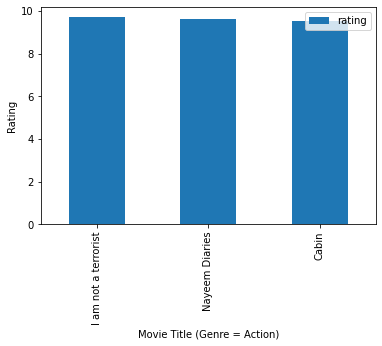

In [ ]:
# x.plot(kind='bar', title='Average rating of movie based on genre',
#                ylabel = 'Average Rating', xlabel='Genres', figsize=(10,6))
a.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Action)')

# for index, value in enumerate(y):
#   plt.text(value, index,
#            str(value))
# plt.show
#For 'Action' movies

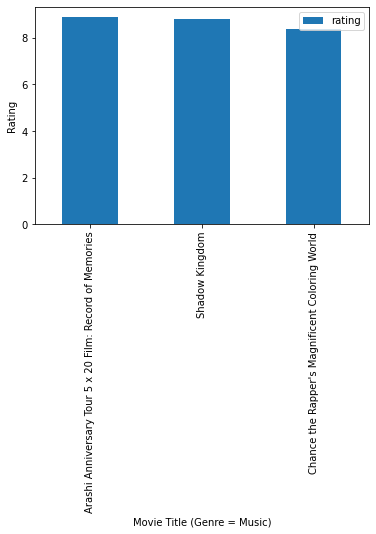

In [ ]:
b.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Music)')

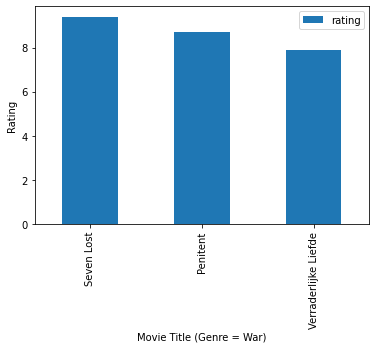

In [ ]:
c.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = War)')

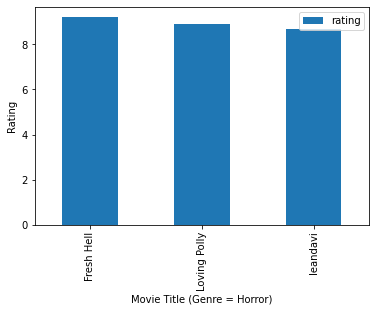

In [ ]:
d.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Horror)')

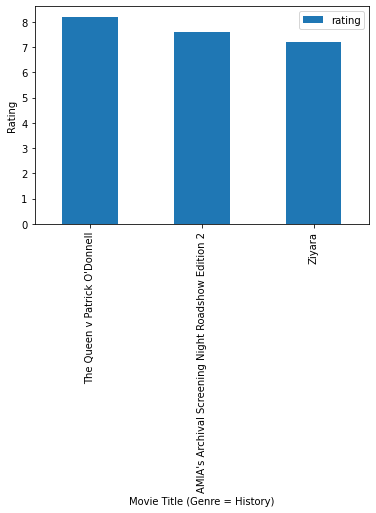

In [ ]:
e.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = History)')

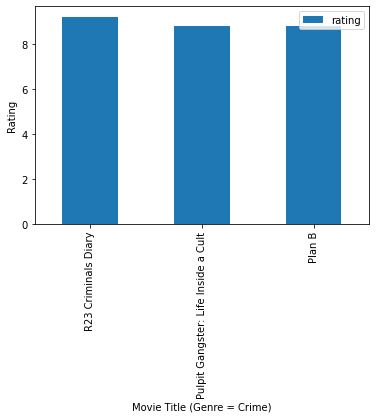

In [ ]:
f.plot.bar(x='title', y='rating', ylabel='Rating',xlabel='Movie Title (Genre = Crime)')

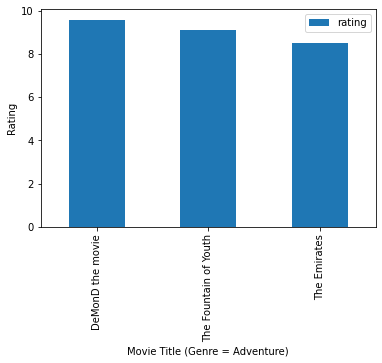

In [ ]:
g.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Adventure)')

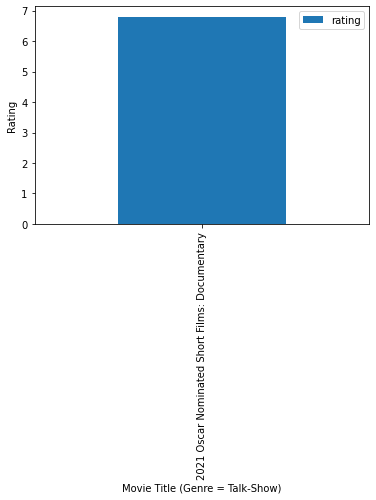

In [ ]:
h.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Talk-Show)')

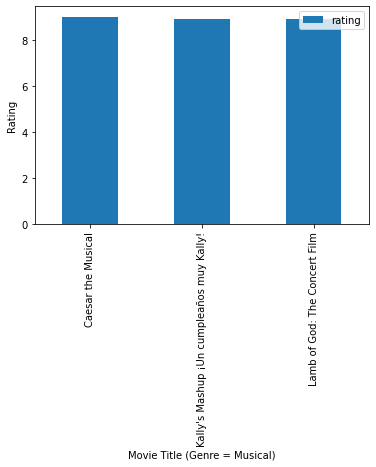

In [ ]:
i.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Musical)')

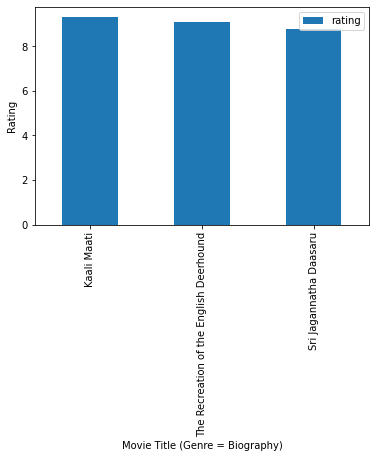

In [ ]:
j.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Biography)')

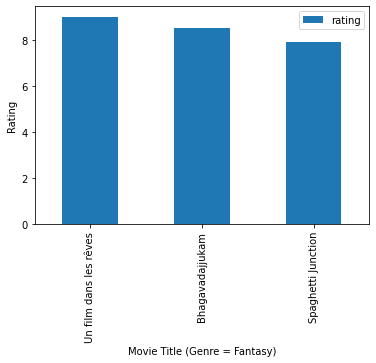

In [ ]:
k.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Fantasy)')

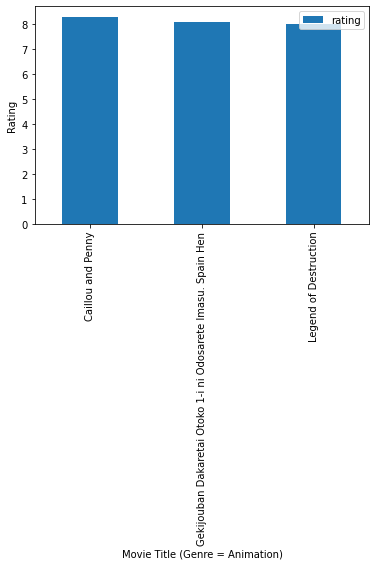

In [ ]:
l.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Animation)')

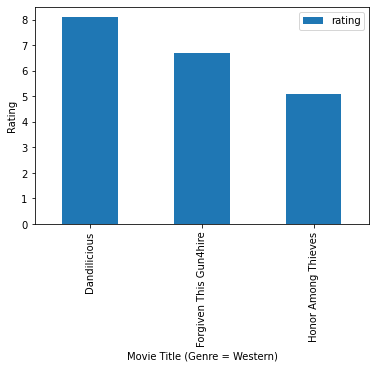

In [ ]:
m.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Western)')

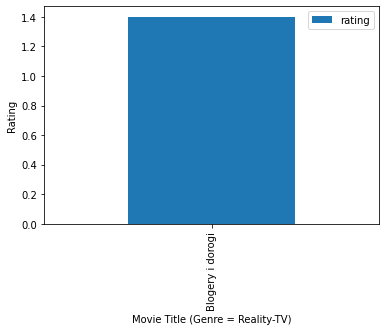

In [ ]:
n.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Reality-TV)')

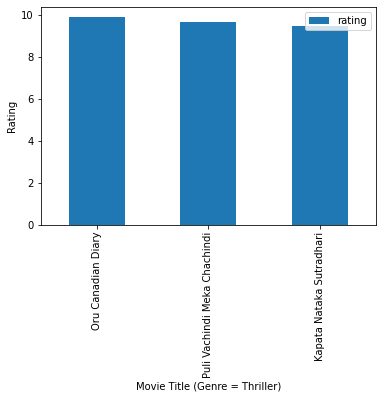

In [ ]:
o.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Thriller)')

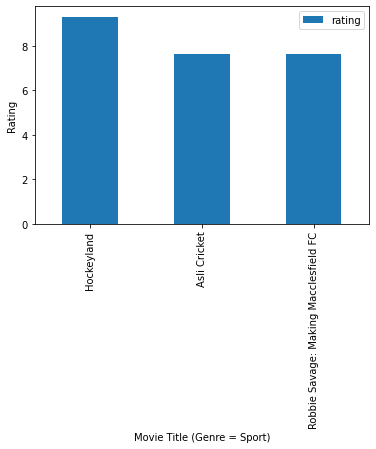

In [ ]:
p.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Sport)')

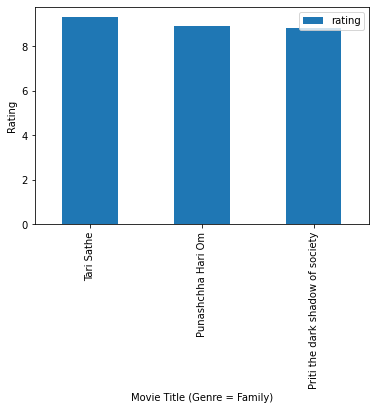

In [ ]:
q.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Family)')

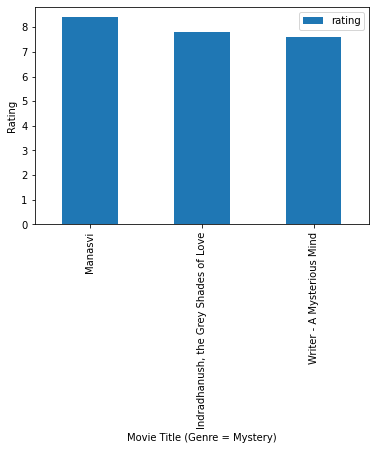

In [ ]:
r.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Mystery)')

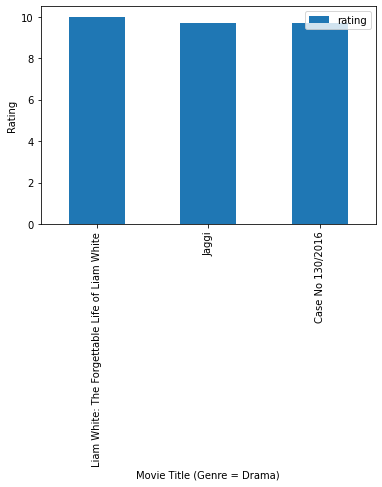

In [ ]:
s.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Drama)')

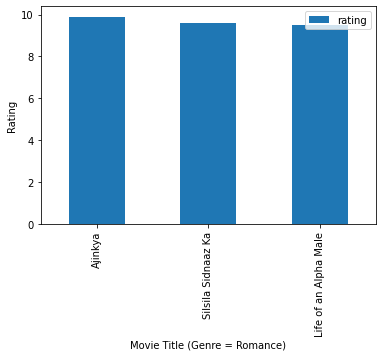

In [ ]:
t.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Romance)')

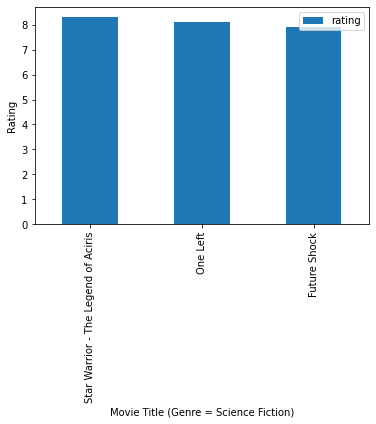

In [ ]:
u.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Science Fiction)')

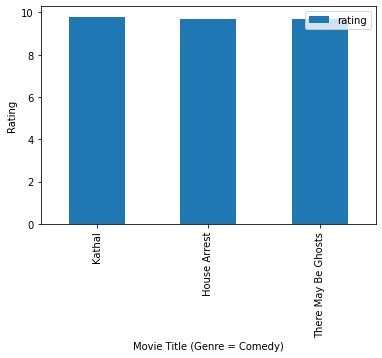

In [ ]:
v.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title (Genre = Comedy)')

In [ ]:
a1 = genredf2.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a1

,title,runtime,genre,rating,votes,metascore
2512,I am not a terrorist,72 min,Action,9.7,114,0.0


In [ ]:
a2 = genredf3.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a2

,title,runtime,genre,rating,votes,metascore
5811,Arashi Anniversary Tour 5 x 20 Film: Record of...,147 min,Music,8.9,25,0.0


In [ ]:
a3 = genredf3.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a3

,title,runtime,genre,rating,votes,metascore
5811,Arashi Anniversary Tour 5 x 20 Film: Record of...,147 min,Music,8.9,25,0.0


In [ ]:
a4 = genredf4.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a4

,title,runtime,genre,rating,votes,metascore
3362,Seven Lost,80 min,War,9.4,35,0.0


In [ ]:
a5 = genredf5.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a5

,title,runtime,genre,rating,votes,metascore
5019,Fresh Hell,79 min,Horror,9.2,31,0.0


In [ ]:
a6 = genredf6.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a6

,title,runtime,genre,rating,votes,metascore
4512,The Queen v Patrick O'Donnell,89 min,History,8.2,18,0.0


In [ ]:
a7 = genredf7.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a7

,title,runtime,genre,rating,votes,metascore
2226,R23 Criminals Diary,120 min,Crime,9.2,147,0.0


In [ ]:
a8 = genredf8.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a8

,title,runtime,genre,rating,votes,metascore
6339,DeMonD the movie,105 min,Adventure,9.6,21,0.0


In [ ]:
a9 = genredf9.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a9

,title,runtime,genre,rating,votes,metascore
7476,2021 Oscar Nominated Short Films: Documentary,136 min,Talk-Show,6.8,16,0.0


In [ ]:
a10 = genredf10.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a10

,title,runtime,genre,rating,votes,metascore
4925,Caesar the Musical,96 min,Musical,9.0,50,0.0


In [ ]:
a11 = genredf11.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a11

,title,runtime,genre,rating,votes,metascore
5407,Kaali Maati,112 min,Biography,9.3,8,0.0


In [ ]:
a12 = genredf12.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a12

,title,runtime,genre,rating,votes,metascore
7301,Un film dans les rêves,82 min,Fantasy,9.0,9,0.0


In [ ]:
a13 = genredf13.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a13

,title,runtime,genre,rating,votes,metascore
6479,Caillou and Penny,110 min,Animation,8.3,14,0.0


In [ ]:
a14 = genredf14.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a14

,title,runtime,genre,rating,votes,metascore
3715,Dandilicious,128 min,Western,8.1,14,0.0


In [ ]:
a15 = genredf15.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a15

,title,runtime,genre,rating,votes,metascore
7737,Blogery i dorogi,85 min,Reality-TV,1.4,23,0.0


In [ ]:
a16 = genredf16.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a16

,title,runtime,genre,rating,votes,metascore
1843,Oru Canadian Diary,128 min,Thriller,9.9,4444,0.0


In [ ]:
a17 = genredf17.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a17

,title,runtime,genre,rating,votes,metascore
4573,Hockeyland,108 min,Sport,9.3,19,0.0


In [ ]:
a18 = genredf18.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a18

,title,runtime,genre,rating,votes,metascore
3373,Tari Sathe,119 min,Family,9.3,525,0.0


In [ ]:
a19 = genredf19.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a19

,title,runtime,genre,rating,votes,metascore
4655,Manasvi,197 min,Mystery,8.4,29,0.0


In [ ]:
a20 = genredf20.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a20

,title,runtime,genre,rating,votes,metascore
4003,Liam White: The Forgettable Life of Liam White,87 min,Drama,10.0,10,0.0


In [ ]:
a21 = genredf21.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a21

,title,runtime,genre,rating,votes,metascore
2953,Ajinkya,143 min,Romance,9.9,752,0.0


In [ ]:
a22 = genredf22.nlargest(1, ['rating'])[['title','runtime','genre','rating','votes','metascore']]
a22

,title,runtime,genre,rating,votes,metascore
6506,Star Warrior - The Legend of Aciris,78 min,Sci-Fi,8.3,22,0.0


In [ ]:
framesGraph = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22]
result1 = pd.concat(framesGraph)
result1

,title,runtime,genre,rating,votes,metascore
2512,I am not a terrorist,72 min,Action,9.7,114,0.0
5811,Arashi Anniversary Tour 5 x 20 Film: Record of...,147 min,Music,8.9,25,0.0
5811,Arashi Anniversary Tour 5 x 20 Film: Record of...,147 min,Music,8.9,25,0.0
3362,Seven Lost,80 min,War,9.4,35,0.0
5019,Fresh Hell,79 min,Horror,9.2,31,0.0
4512,The Queen v Patrick O'Donnell,89 min,History,8.2,18,0.0
2226,R23 Criminals Diary,120 min,Crime,9.2,147,0.0
6339,DeMonD the movie,105 min,Adventure,9.6,21,0.0
7476,2021 Oscar Nominated Short Films: Documentary,136 min,Talk-Show,6.8,16,0.0
4925,Caesar the Musical,96 min,Musical,9.0,50,0.0


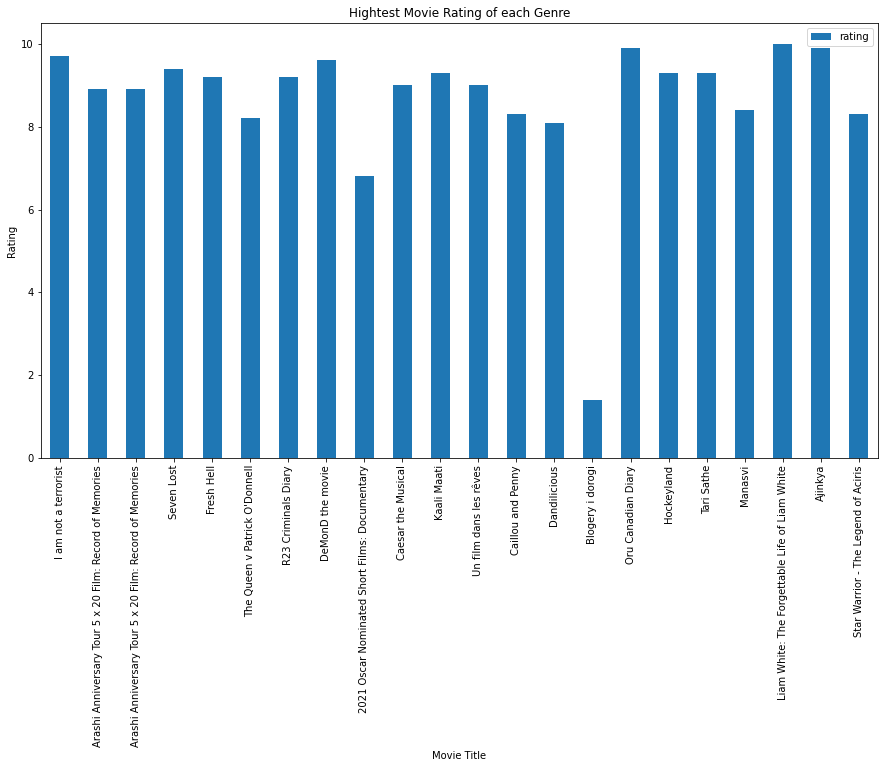

In [ ]:
genreGraph = ['Action','Music','War','Horror','History','Crime',
              'Adventure','Talk-Show','Musical','Biography','Fantasy',
              'Animation','Western','Reality-TV','Thriller','Sport',
              'Family','Mystery','Drama','Romance','Sci-Fi','Comedy']
result1.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title', title='Hightest Movie Rating of each Genre', figsize=(15,8))

In [ ]:
# frames = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v]
# result = pd.concat(frames)
# result

In [ ]:
# result.plot.bar(x='title', y='rating', ylabel='Rating', xlabel='Movie Title', figsize=(15,8))

In [ ]:
# from pandas.core.tools.datetimes import Scalar
# sns.pairplot(result, vars=["rating"], dropna=True, hue =None)

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
# x = df['Genres']
# y = df['rating']
# plt.figure(figsize=(14,8))
# plt.hist(x,bins=9)
# plt.title('No of counts for each genre')

# plt.xlabel('Genres')
# plt.ylabel('Rating')
# plt.show()

# px.bar(data_frame = df, x='Genres', y='rating', orientation='v', width=800, height=400)
# layout = go.Layout(yaxis=dict(range=[0,10]))
# # px.show()


# fig = px.bar(df, x="Genres", y="rating", title='Rating for each movie')
# fig.show


In [ ]:
# def fetch_list_value(list_name):
#   value = list_name[0]
#   return value

# df['title'] = df.title.map(fetch_list_value)
# df['rating'] = df.rating.map(fetch_list_value)
# df['metascore'] = df.metascore.map(fetch_list_value)



In [ ]:
# highest_rate = df['Action'].value_count()[:20]
# data = df.DataFrame(highest_rate)
# data

#Conclusion

The above graph show the name of the movies with highest rating for each genre. We can conclude that Drama with highest rating of 10 and Thriller with highest rating of 9.9 is enjoyed by most of the population.